In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Bootstrap Partial Dependence

In [3]:
boot_num = 50

In [4]:
bootstrap_main(df, grid_size, boot_num, do_par = True)

the plot for this is in `partial_dependence_R`

# 2D Partial Dependence

Fit a GBRF to the entire dataset and plot the 2D partial dependence for selected features

In [7]:
# fit the gbrf
df_x, target = prepare_lst_prediction(df)
df_x  = subset_regression_data(df_x, df_x)[0]
gbm_night = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_night.fit(df_x, target['lst_night_mean'])
gbm_day = GradientBoostingRegressor(max_depth=2, random_state=RANDOM_SEED, learning_rate=0.1, n_estimators=500, loss='ls')
gbm_day.fit(df_x, target['lst_day_mean'])

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=3201,
             subsample=1.0, verbose=0, warm_start=False)

<a list of 6 text.Text objects>

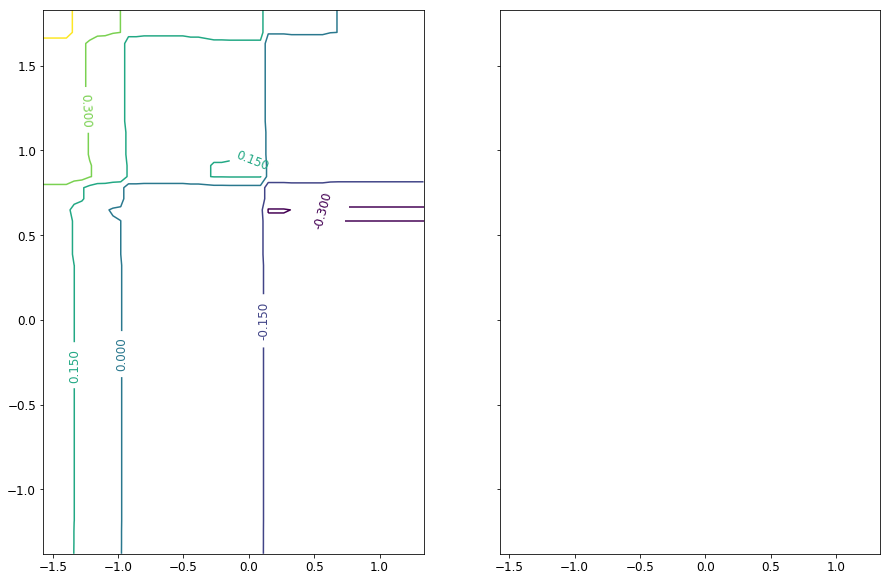

In [41]:
# two way partial dependence

# plot setup (surely this can be a function)
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",]
sns.set_palette(five_thirty_eight)
mpl.rcParams.update({'font.size': 12})
# init subplots (left is nocturnal, right is diurnal)
fig, axes = plt.subplots(1, 2, figsize = (15,10), sharey=True, sharex=True)
# loop through the top n variables by nocturnal importance
feature = 0
features = ['']
levels_set = False
left_right = 0
# for period in ['nocturnal', 'diurnal']:
#     gbm = reg_gbm[period][city]
    # calculate the partial dependence
pdp, ax = partial_dependence(gbm_night, (5, 1), X = df_x,
                        grid_resolution = 50)
# get data
XX, YY = np.meshgrid(ax[0], ax[1])
Z = pdp[0].reshape(list(map(np.size, ax))).T
# add the line to the plot
CS = axes[left_right].contour(XX,YY,Z)#, levels=np.arange(-8,4,1))
axes[left_right].clabel(CS, inline=True, fontsize=12)
# title and axis labels
# axes[feature, left_right].set_title('{} {}'.format(period,city))
#     plt.xlabel('Canopy cover')
#     plt.ylabel('NDVI')